🎯 Tareas a realizar:
1. Carga los datos y convierte Aprobó a 0/1.

2. Entrena un modelo de regresión logística con Scikit-Learn.

3. Evalúa su precisión (accuracy).

4. Predice si un estudiante que estudia 3.5 horas aprobará.

5. Imprime también la probabilidad de aprobación.

6. (Opcional) Grafica los datos y la curva logística.



Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

1. Carga los datos y convierte Aprobó a 0/1.

In [ ]:
df = pd.read_csv('Regresión.csv')
df['Aprobó'] = df['Aprobó'].map({'Sí':1, 'No':0})
df.head()

,Horas_estudio,Aprobó
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


2. Entrena un modelo de regresión logística con Scikit-Learn.

In [ ]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df[['Horas_estudio']], df['Aprobó'], test_size=0.2, random_state=42)
model.fit(x_train, y_train)

LogisticRegression()

3. Evalúa su precisión (accuracy).

In [ ]:
accuracy = accuracy_score(y_test, model.predict(x_test))
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 1.0


4. Predice si un estudiante que estudia 3.5 horas aprobará.

In [ ]:
NewStudent = np.array([3.5]).reshape(-1, 1)
prediction = model.predict(NewStudent)
label = {1:'Sí', 0:'No'}
print(f'Aprobó: {label[prediction[0]]}')

Aprobó: Sí


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


5. Imprime también la probabilidad de aprobación.

In [ ]:
PredictProbability = model.predict_proba(NewStudent)
print(f'Probabilidad de aprobación: %{PredictProbability[0][1]*100:.2f}, Probabilidad de no aprobar: %{PredictProbability[0][0]*100:.2f}')

Probabilidad de aprobación: %55.13, Probabilidad de no aprobar: %44.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


6. Grafica los datos y la curva logística.

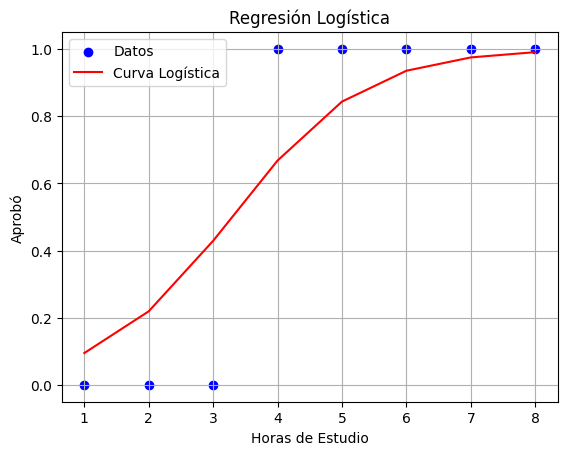

In [ ]:
plt.scatter(df['Horas_estudio'], df['Aprobó'], color='blue', label='Datos')
plt.plot(df['Horas_estudio'], model.predict_proba(df[['Horas_estudio']])[:, 1], color='red', label='Curva Logística')
plt.xlabel('Horas de Estudio')
plt.ylabel('Aprobó')
plt.legend()
plt.title('Regresión Logística')
plt.grid()
plt.show()